In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#9): Which is digit '4'


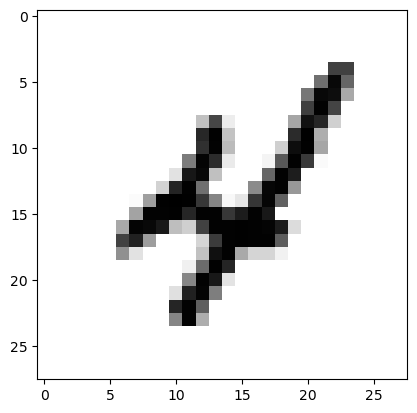

In [3]:
digit = 9 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

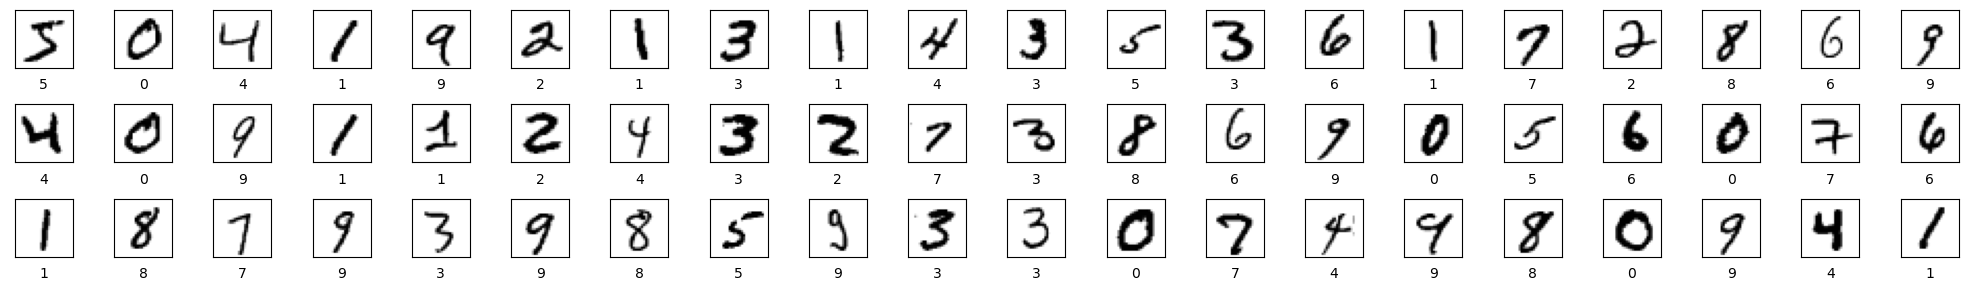

In [4]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [5]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32")/255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") /255.0

Image (#9): Which is digit '4'


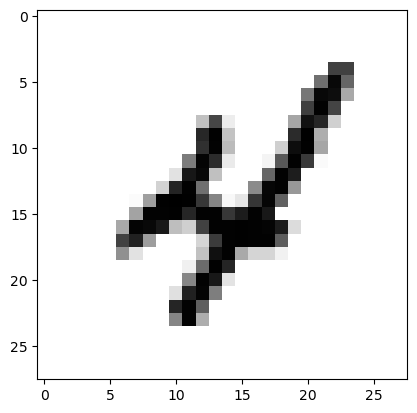

In [6]:
digit = 9 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [8]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
657/657 [==============================] - 17s 26ms/step - loss: 0.3069 - accuracy: 0.9081 - val_loss: 0.1616 - val_accuracy: 0.9492
Epoch 2/5
657/657 [==============================] - 16s 25ms/step - loss: 0.1009 - accuracy: 0.9697 - val_loss: 0.0831 - val_accuracy: 0.9757
Epoch 3/5
657/657 [==============================] - 18s 28ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0931 - val_accuracy: 0.9727
Epoch 4/5
657/657 [==============================] - 17s 26ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0717 - val_accuracy: 0.9792
Epoch 5/5
657/657 [==============================] - 18s 28ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0749 - val_accuracy: 0.9790


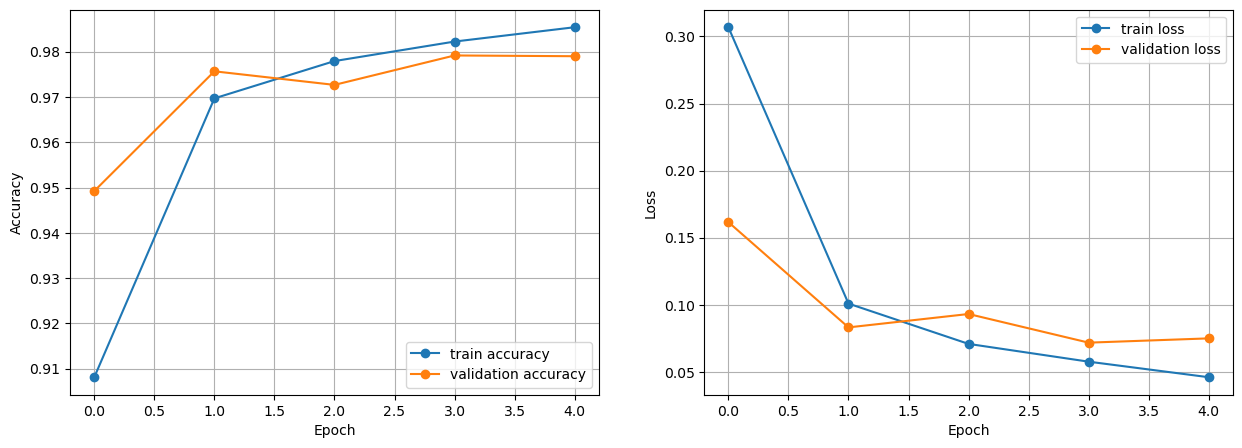

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [11]:
model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
657/657 [==============================] - 17s 27ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.0529 - val_accuracy: 0.9855
Epoch 2/5
657/657 [==============================] - 17s 26ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0502 - val_accuracy: 0.9866
Epoch 3/5
657/657 [==============================] - 18s 28ms/step - loss: 0.0207 - accuracy: 0.9941 - val_loss: 0.0509 - val_accuracy: 0.9868
Epoch 4/5
657/657 [==============================] - 18s 27ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0506 - val_accuracy: 0.9866
Epoch 5/5
657/657 [==============================] - 16s 25ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0493 - val_accuracy: 0.9869


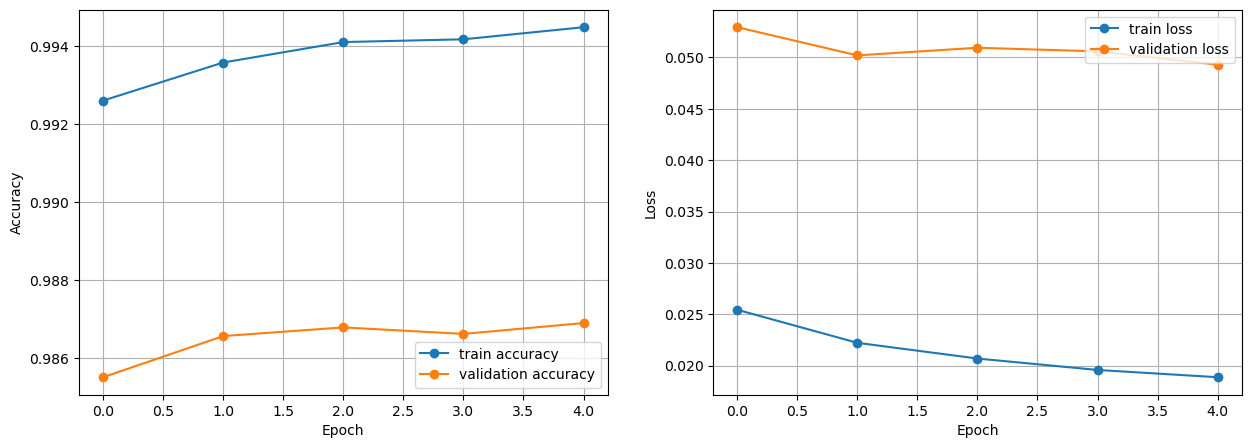

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [15]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
657/657 [==============================] - 19s 29ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0694 - val_accuracy: 0.9810
Epoch 2/5
657/657 [==============================] - 18s 27ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0788 - val_accuracy: 0.9767
Epoch 3/5
657/657 [==============================] - 20s 30ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0641 - val_accuracy: 0.9838
Epoch 4/5
657/657 [==============================] - 20s 30ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0785 - val_accuracy: 0.9797
Epoch 5/5
657/657 [==============================] - 19s 29ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0702 - val_accuracy: 0.9834


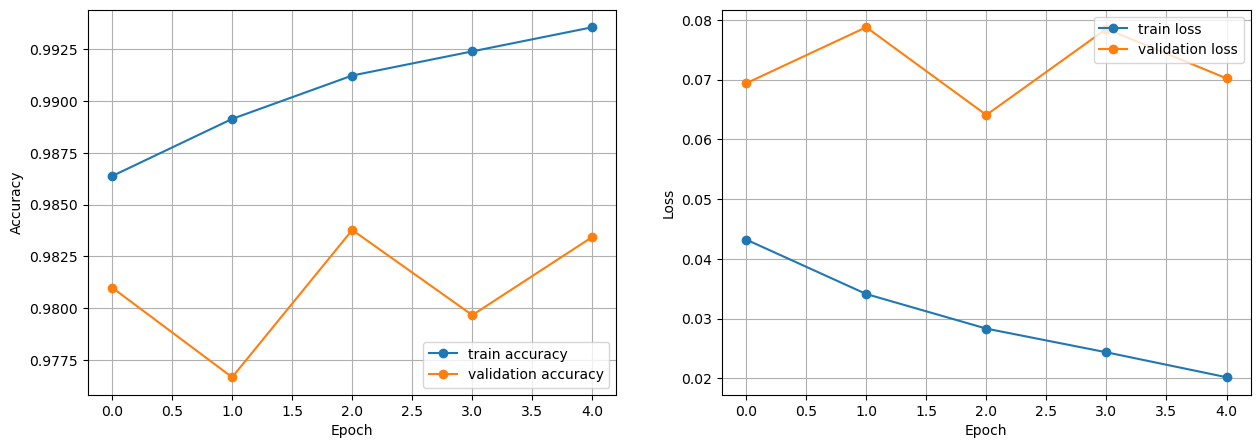

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()